In [1]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import imutils
import dlib
import cv2

from vanilamodel import PoseVanila


In [2]:
def show_image(img):
    plt.axis("off")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [4]:


### 3d Model

class FaceModel:
    def load_model(self, path, name):
        model = loadmat(path)[name]
        self.out_A = np.asmatrix(model['outA'][0, 0], dtype='float32') #3x3
        self.size_U = model['sizeU'][0, 0][0] #1x2
        self.model_TD = np.asarray(model['threedee'][0,0], dtype='float32') #68x3
        self.indbad = model['indbad'][0, 0]#0x1
        self.ref_U = np.asarray(model['refU'][0,0])
        self.facemask = np.asarray(model['facemask'][0,0])
        self.facemask-=1 #matlab indexing

model = FaceModel()

model.load_model("../model3D_aug_-00_00_01.mat","model3D")

## Face detector

shape_predictor = "../shape_predictor_68_face_landmarks.dat"
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

### Vanila model

vanila_model = PoseVanila( model.out_A, model.model_TD, detector, predictor)

In [5]:
!ls ../valid_set/

faces  faces_validation.csv  images  validation_set.csv


In [6]:
validation_dir = "../valid_set"

In [7]:
df_valid = pd.read_csv("{}/validation_set.csv".format(validation_dir), index_col=0)

In [8]:
def extract_faces(df, dir_path):
    df = df.copy()
    remove = []
    for i, row in df.iterrows():
        image_path = "{}/images/{}".format(dir_path, row["file name"])
        face_path = "{}/faces/{}".format(dir_path, row["file name"])
        image = cv2.imread(image_path)
        shape, face, image = vanila_model.get_landmarks_2d(image)
    #     show_image(image)
        if(face is not None):
            face = imutils.resize(face, width=128)
    #     show_image(face)
            cv2.imwrite(face_path, face)
            df.loc[i, "image_path"] = face_path
        else:
            remove.append(i)
    df = df.drop(remove).drop("file name", axis=1)
    return df


In [9]:
df_faces = extract_faces(df_valid, validation_dir)

In [10]:
df_faces

,rx,ry,rz,tx,ty,tz,image_path
0,0.232823,0.258984,0.179867,53.709269,76.402880,2496.058176,../valid_set/faces/image_03219.png
1,-0.119785,0.362839,-0.062090,137.927724,115.523209,2427.485141,../valid_set/faces/image_00402.png
2,0.107773,-0.038309,0.116286,148.894921,113.838309,2138.816636,../valid_set/faces/image_04501.png
3,0.184916,-0.129779,0.049919,169.859404,74.267703,2098.792519,../valid_set/faces/image_08929.png
4,0.151122,-0.300772,0.015359,66.115997,40.895412,2718.224083,../valid_set/faces/image_07866.png
...,...,...,...,...,...,...,...
93,0.192344,0.028983,0.000739,26.720138,45.456652,1652.608937,../valid_set/faces/image_05741.png
95,-0.213852,0.042669,0.231739,166.217478,41.252032,1710.019103,../valid_set/faces/image_02170.png
96,0.194637,0.221584,-0.152009,116.124727,34.273149,2501.398260,../valid_set/faces/image_09896.png
97,0.252662,0.055673,-0.146309,7.138096,27.443552,2463.320832,../valid_set/faces/image_02063.png


In [11]:
df_faces.to_csv ("{}/faces_validation.csv".format(validation_dir), index = None, header=True)

In [12]:
df_faces2 = pd.read_csv("{}/faces_validation.csv".format(validation_dir))

In [13]:
df_faces2

,rx,ry,rz,tx,ty,tz,image_path
0,0.232823,0.258984,0.179867,53.709269,76.402880,2496.058176,../valid_set/faces/image_03219.png
1,-0.119785,0.362839,-0.062090,137.927724,115.523209,2427.485141,../valid_set/faces/image_00402.png
2,0.107773,-0.038309,0.116286,148.894921,113.838309,2138.816636,../valid_set/faces/image_04501.png
3,0.184916,-0.129779,0.049919,169.859404,74.267703,2098.792519,../valid_set/faces/image_08929.png
4,0.151122,-0.300772,0.015359,66.115997,40.895412,2718.224083,../valid_set/faces/image_07866.png
...,...,...,...,...,...,...,...
74,0.192344,0.028983,0.000739,26.720138,45.456652,1652.608937,../valid_set/faces/image_05741.png
75,-0.213852,0.042669,0.231739,166.217478,41.252032,1710.019103,../valid_set/faces/image_02170.png
76,0.194637,0.221584,-0.152009,116.124727,34.273149,2501.398260,../valid_set/faces/image_09896.png
77,0.252662,0.055673,-0.146309,7.138096,27.443552,2463.320832,../valid_set/faces/image_02063.png


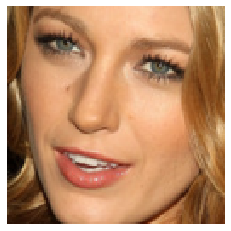

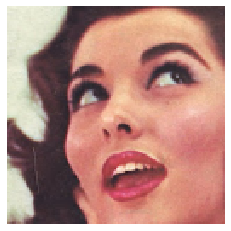

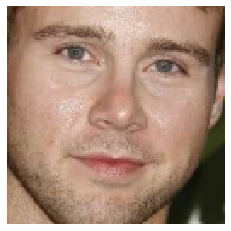

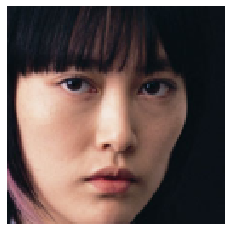

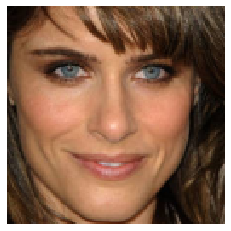

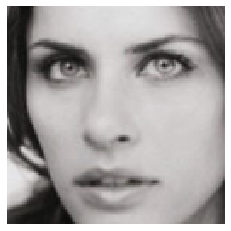

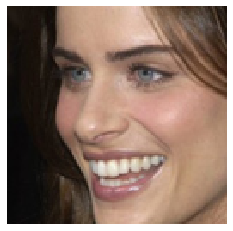

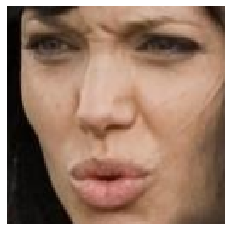

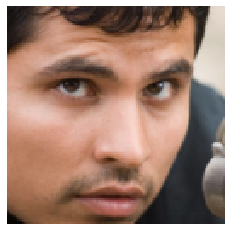

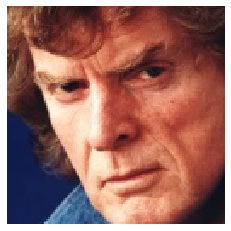

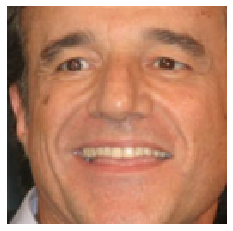

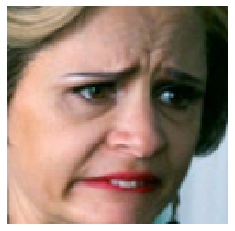

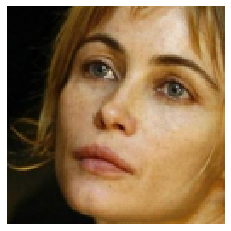

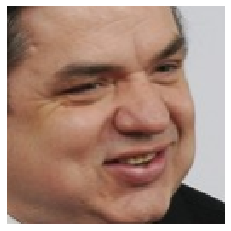

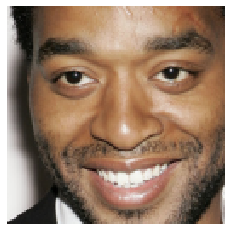

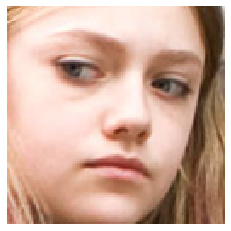

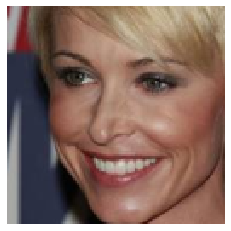

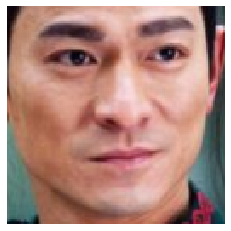

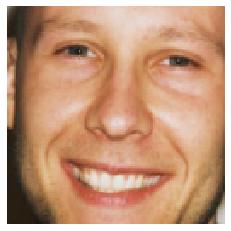

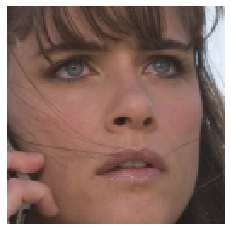

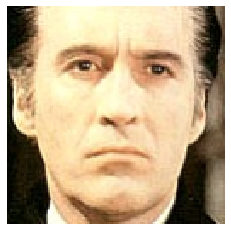

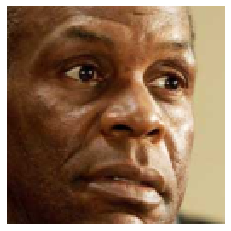

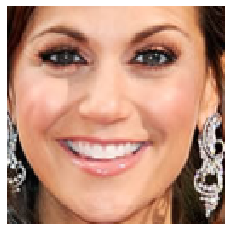

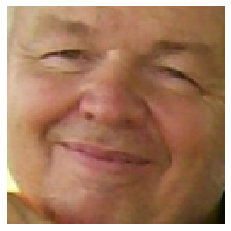

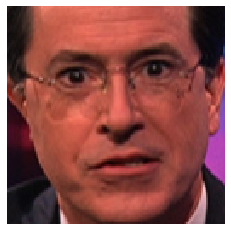

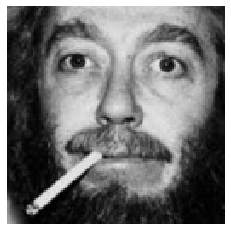

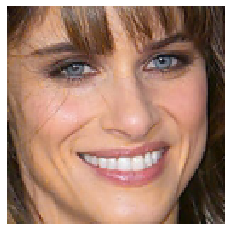

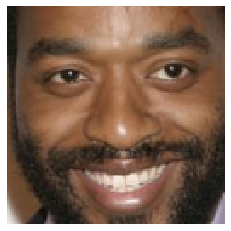

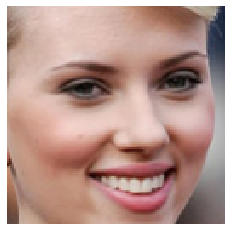

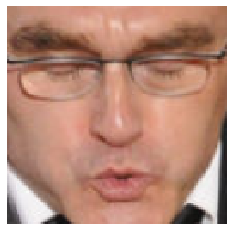

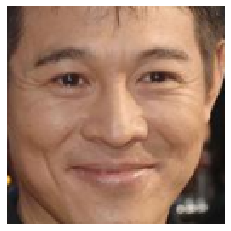

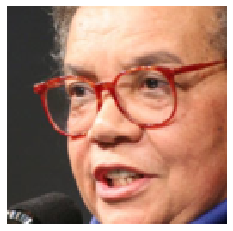

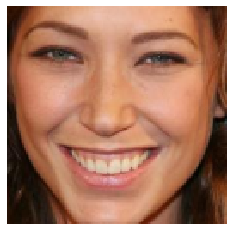

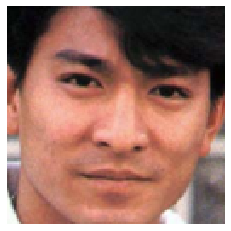

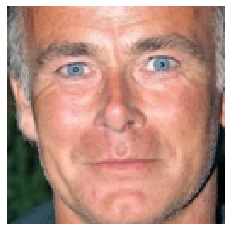

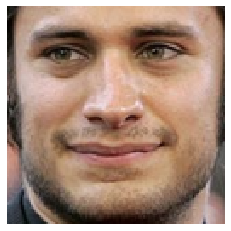

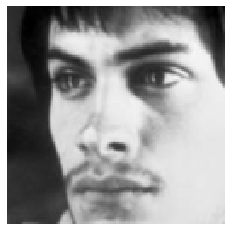

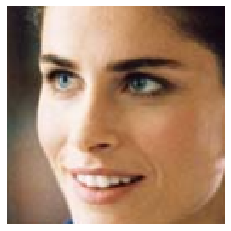

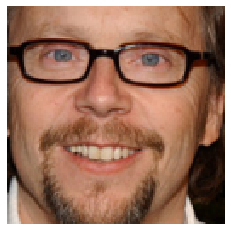

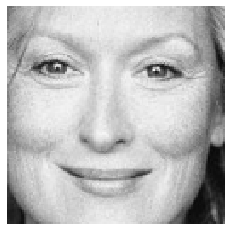

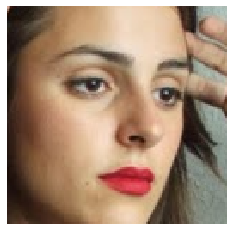

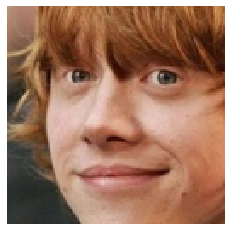

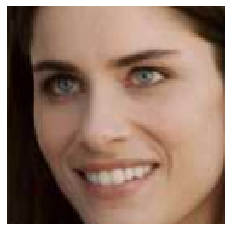

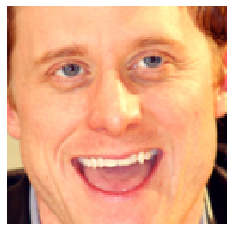

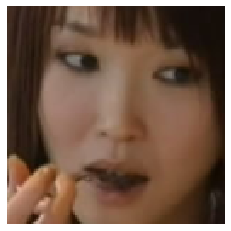

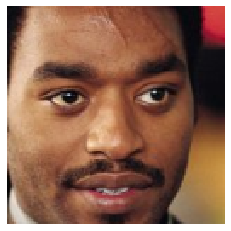

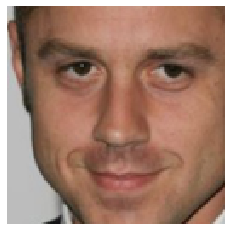

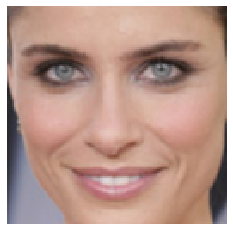

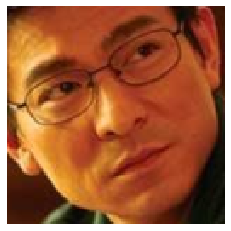

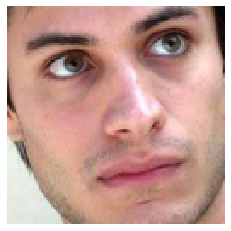

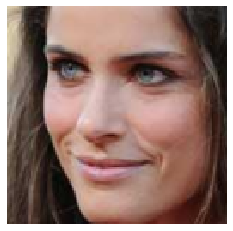

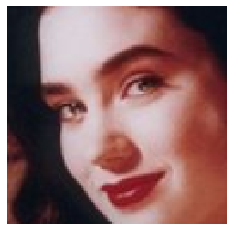

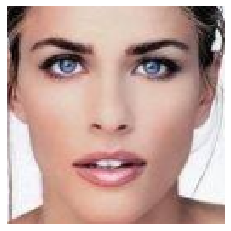

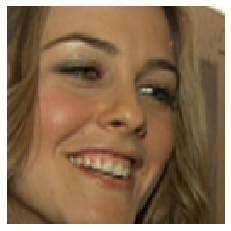

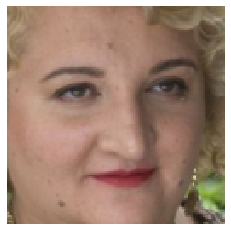

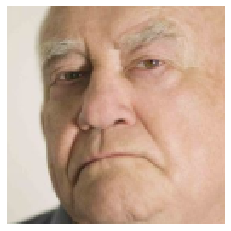

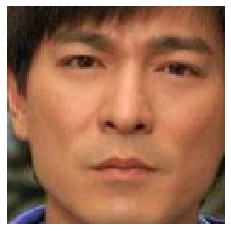

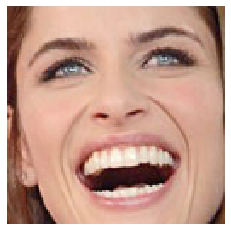

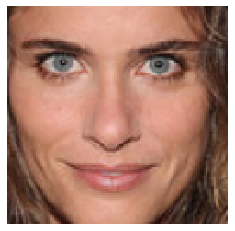

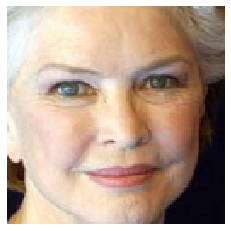

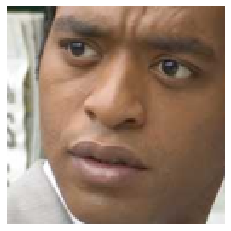

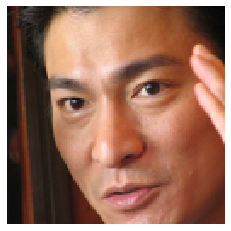

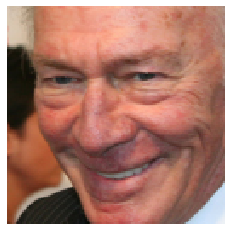

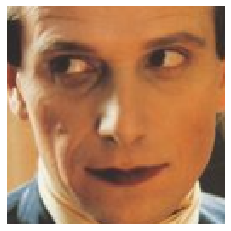

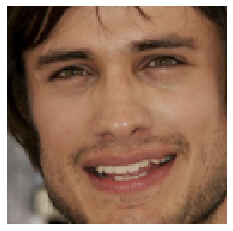

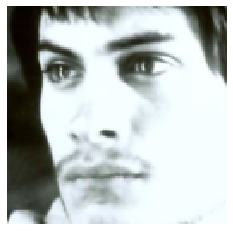

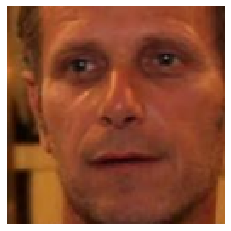

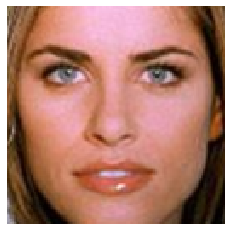

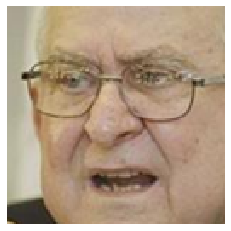

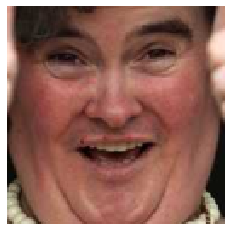

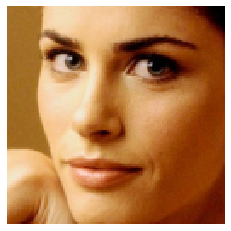

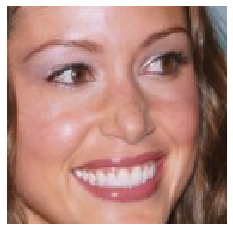

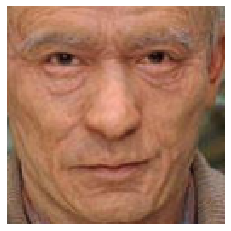

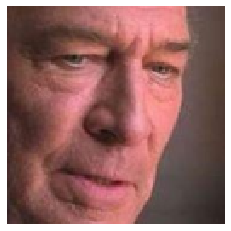

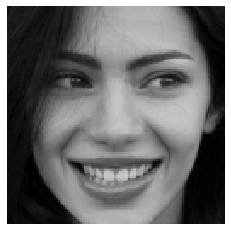

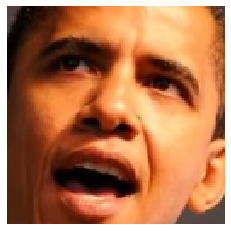

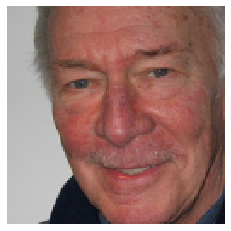

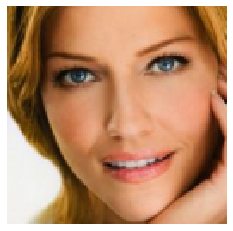

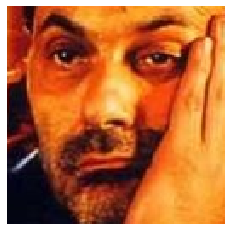

In [14]:
for i, row in df_faces2.iterrows():
    image_path = row["image_path"]
    image = cv2.imread(image_path)
    show_image(image)